Image Analysis Take Home Assignment- Question 2


Submitted by: Aayushi Pandey


SNR: 2038981

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data, color
from skimage.morphology import dilation, erosion, opening, closing, white_tophat, black_tophat, reconstruction, extrema, watershed
from skimage.morphology import binary_dilation, binary_erosion, binary_opening, binary_closing
from skimage.morphology import square, rectangle, diamond, disk, cube,  octahedron, ball, star, octagon 
from skimage.morphology import skeletonize, thin
from skimage.morphology import medial_axis
from skimage.filters import threshold_otsu
from skimage import filters
from skimage.filters.rank import median
from skimage.filters import rank
from skimage.util import img_as_ubyte
from skimage import util
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.measure import label, regionprops
from skimage import filters
from skimage.color import label2rgb
from skimage.filters import roberts, sobel, sobel_h, sobel_v, prewitt, prewitt_v, prewitt_h
from skimage import feature
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks, probabilistic_hough_line
import scipy
import math

%matplotlib inline

2.1
Part 1: Load your image and crop it from y = 1 and x = 1001 for a height of 800 pixels and a width of 1500. E.g the input for crop rectangle tuple of ((x,y,x+width,y+height) would be ((1001,1,2500,800)). 

Text(0.5, 1.0, 'Cropped Image')

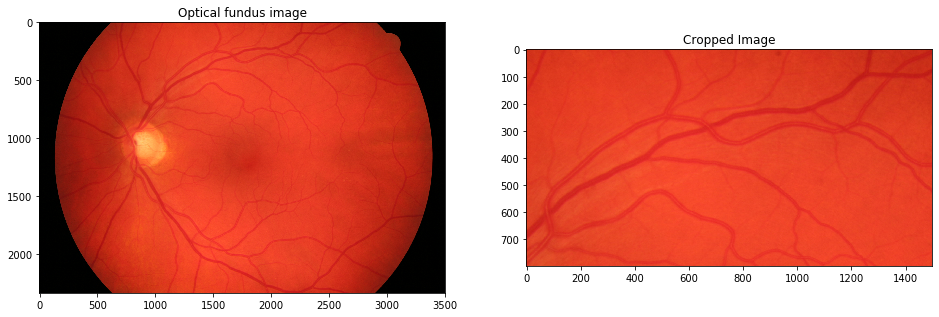

In [2]:
im = io.imread('2038981/img_08_h.jpg')

plt.figure(figsize = (16,16))
plt.subplot(1,2,1)
plt.imshow(im)
plt.title("Optical fundus image")


cropped_im = im[1:800,1001:2500, :]
plt.subplot(1,2,2)
plt.imshow(cropped_im)
plt.title("Cropped Image")

2.1 Part2: 
You will write code to segment vessels in the cropped fundus image. Your solution do not have to be limited to simply applying standard image analysis techniques. The binary image is the manual annotation results. Compare the accuracy of your segmentation solution with this binary image. 

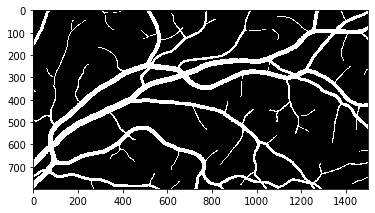

In [3]:
binary_true = io.imread("2038981/manual_08_h.tif")
binary_true_cropped = binary_true[1:800,1001:2500]
plt.imshow(binary_true_cropped, cmap = "gray")

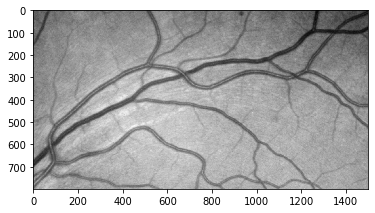

In [4]:
# Converting to graysacale and changing data type to float
im_gray = color.rgb2gray(cropped_im)

im_gray = im_gray.astype(float)
im_gray = im_gray - im_gray.min()
im_gray = im_gray/im_gray.max()

plt.imshow(im_gray, cmap = "gray")

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


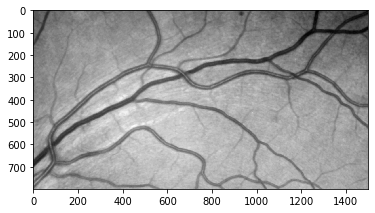

In [5]:
denoised_ = median(im_gray, disk(3))
plt.imshow(denoised_, cmap = "gray")

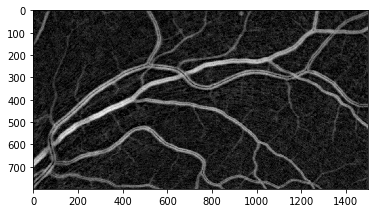

In [6]:
im1 = closing(im_gray,disk(25))
plt.imshow(im1 - im_gray, cmap = 'gray') # I do this to deal with illumination effects

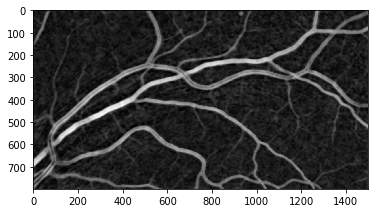

In [7]:
im4 = im1 - im_gray

denoise = median(im4, disk(5))

plt.imshow(denoise, cmap = "gray")

(-0.5, 1498.5, 798.5, -0.5)

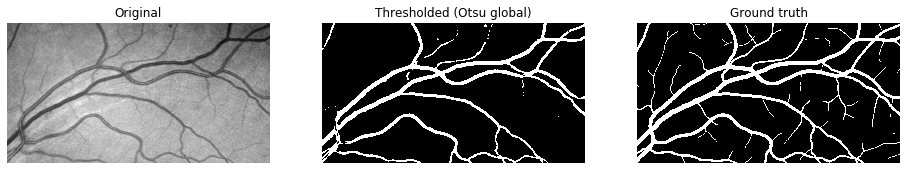

In [8]:
# Segmentation using global thresholding
global_thresh = threshold_otsu(denoise)
binary_global = denoise > global_thresh

fig, axes = plt.subplots(ncols=3, figsize=(16, 16))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(im_gray, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(binary_global, cmap=plt.cm.gray)
ax[1].set_title('Thresholded (Otsu global)')
ax[1].axis('off')
ax[2].imshow(binary_true_cropped, cmap = plt.cm.gray)
ax[2].set_title("Ground truth")
ax[2].axis('off')

In [9]:
# Jaccard coefficient computation
from sklearn.metrics import jaccard_score
jaccard_score(binary_true_cropped, binary_global, average = "samples")

0.7181826560137381

(-0.5, 1498.5, 798.5, -0.5)

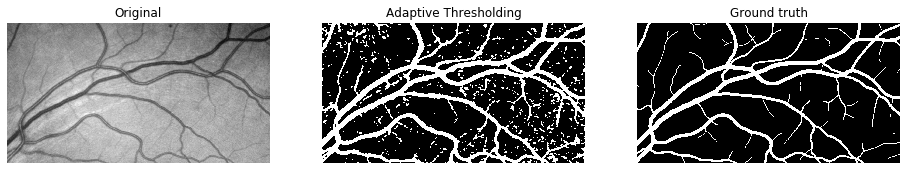

In [10]:
# Adaptive thresholding

block_size = 701
imbw = denoise  > filters.threshold_local(denoise , block_size, method = 'mean')

fig, axes = plt.subplots(ncols=3, figsize=(16, 16))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(im_gray, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(imbw, cmap=plt.cm.gray)
ax[1].set_title('Adaptive Thresholding')
ax[1].axis('off')
ax[2].imshow(binary_true_cropped, cmap = plt.cm.gray)
ax[2].set_title("Ground truth")
ax[2].axis('off')


In [11]:
jaccard_score(binary_true_cropped,imbw, average = "samples")

0.5682197671439326

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(<matplotlib.axes._subplots.AxesSubplot at 0x16068cb0710>,
 (-0.5, 1498.5, 798.5, -0.5),
 Text(0.5, 1.0, 'Closing by Reconstruction'))

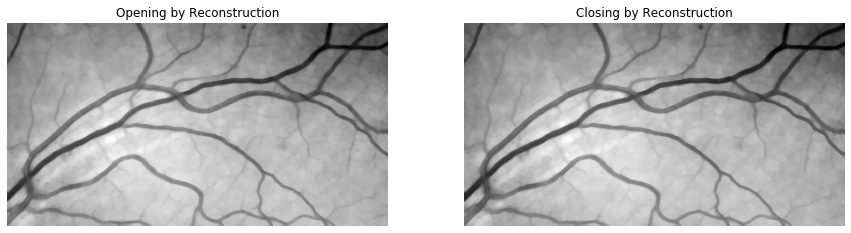

In [12]:

im0 = img_as_ubyte(im_gray)
denoise = median(im0, disk(7))


im_open = opening(denoise,disk(7))
im_erode = erosion(denoise,disk(7))
im_oer  = reconstruction(im_erode,im_open);

im_oerd = dilation(im_oer,disk(5))
im_oercr = reconstruction(util.invert(im_oerd),util.invert(im_oer));
im_oercr = util.invert(im_oercr);

plt.figure(figsize=(15,8))
plt.subplot(121), plt.imshow(im_oer, cmap='gray'), plt.axis('off'), plt.title('Opening by Reconstruction') 
# You open by using image as a mask.
plt.subplot(122), plt.imshow(im_oercr, cmap='gray'), plt.axis('off'), plt.title('Closing by Reconstruction') 



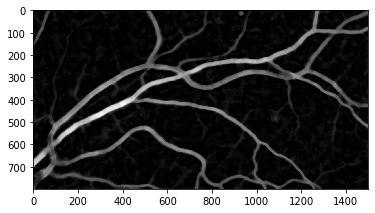

In [13]:
img = closing(im_oercr,disk(25))
plt.imshow(img, cmap = "gray")
plt.imshow(img - im_oercr, cmap = 'gray') # I do this to deal with illumination effects

(-0.5, 1498.5, 798.5, -0.5)

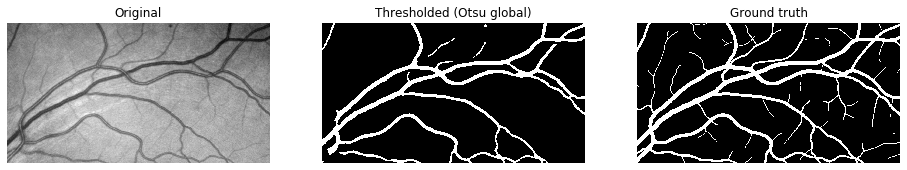

In [14]:
global_thresh = threshold_otsu(img - im_oercr)
binary_global = (img- im_oercr) > global_thresh

fig, axes = plt.subplots(ncols=3, figsize=(16, 16))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(im_gray, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(binary_global, cmap=plt.cm.gray)
ax[1].set_title('Thresholded (Otsu global)')
ax[1].axis('off')
ax[2].imshow(binary_true_cropped, cmap = plt.cm.gray)
ax[2].set_title("Ground truth")
ax[2].axis('off')



In [15]:
jaccard_score(binary_true_cropped,binary_global, average = "samples")

0.7036904508083409

(-0.5, 1498.5, 798.5, -0.5)

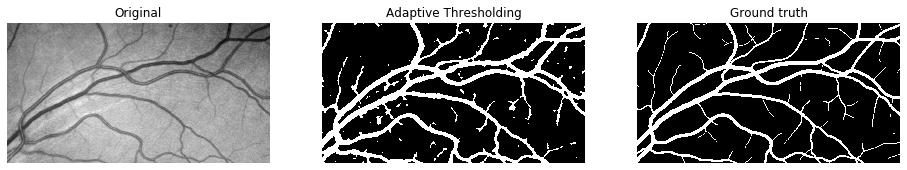

In [16]:
block_size = 3001
imbw = img - im_oercr  > filters.threshold_local(img - im_oercr , block_size, method = 'mean')

fig, axes = plt.subplots(ncols=3, figsize=(16, 16))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(im_gray, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(imbw, cmap=plt.cm.gray)
ax[1].set_title('Adaptive Thresholding')
ax[1].axis('off')
ax[2].imshow(binary_true_cropped, cmap = plt.cm.gray)
ax[2].set_title("Ground truth")
ax[2].axis('off')


In [17]:
jaccard_score(binary_true_cropped,imbw, average = "samples")

0.6517014236626127

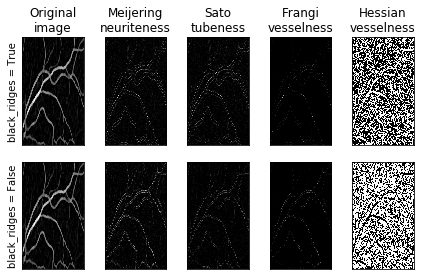

In [18]:
from skimage.filters import meijering, sato, frangi, hessian


def identity(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image

image = img - im_oercr
kwargs = {}
kwargs['sigmas'] = [1]

fig, axes = plt.subplots(2,5)
for i, black_ridges in enumerate([1, 0]):
    for j, func in enumerate([identity, meijering, sato, frangi, hessian]):
        kwargs['black_ridges'] = black_ridges
        result = func(image, **kwargs)
        if func in (meijering, frangi):
            # Crop by 4 pixels for rendering purpose.
            result = result[4:-4, 4:-4]
        axes[i, j].imshow(result, cmap="gray", aspect='auto')
        if i == 0:
            axes[i, j].set_title(['Original\nimage', 'Meijering\nneuriteness',
                                  'Sato\ntubeness', 'Frangi\nvesselness',
                                  'Hessian\nvesselness'][j])
        if j == 0:
            axes[i, j].set_ylabel('black_ridges = ' + str(bool(black_ridges)))
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

# Because of the image being too noisy, I can't get a good result using ridge filters
# Source : https://scikit-image.org/docs/dev/auto_examples/edges/plot_ridge_filter.html

2.2 Part 1: Remove small vessels (less than 8 pixels wide) with morphological opening

Text(0.5, 1.0, 'Binary Image')

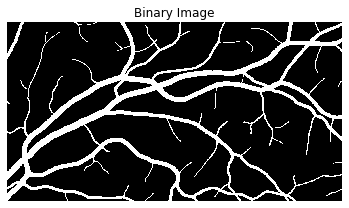

In [19]:
im_binary = io.imread("2038981/manual_08_h.tif")
im_binary = im_binary[1:800,1001:2500]
plt.imshow(im_binary,cmap = "gray")
plt.axis("off")
plt.title("Binary Image")

Text(0.5, 1.0, 'Opened binary image')

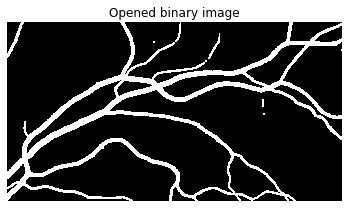

In [20]:
im_open = binary_opening(im_binary, square(8))

plt.figure()
plt.imshow(im_open, cmap = "gray")
plt.axis("off")
plt.title("Opened binary image")

2.2 Part 2:  Apply morphological thinning to obtain a 1-pixel thin centerline of the vascular network. Apply a medial axis transforms to compute the width of the vessel for the pixels of the skeleton

(-0.5, 1498.5, 798.5, -0.5)

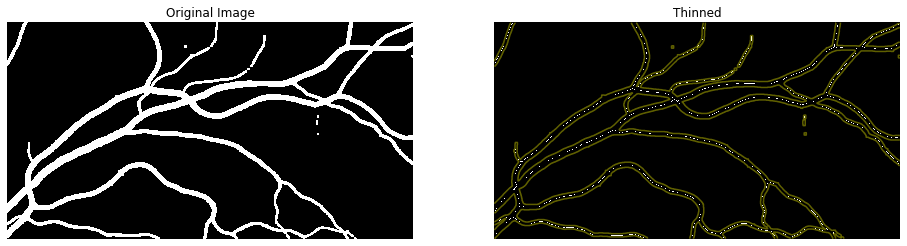

In [21]:
thinned = thin(im_open)
plt.figure(figsize = (16,16))
plt.subplot(121)
plt.imshow(im_open, cmap = "gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(122) 
plt.imshow(thinned, cmap = "gray") 
plt.contour(im_open, [0.5], colors='y', alpha = 0.5) 
plt.title('Thinned')
plt.axis('off') 

(-0.5, 1498.5, 798.5, -0.5)

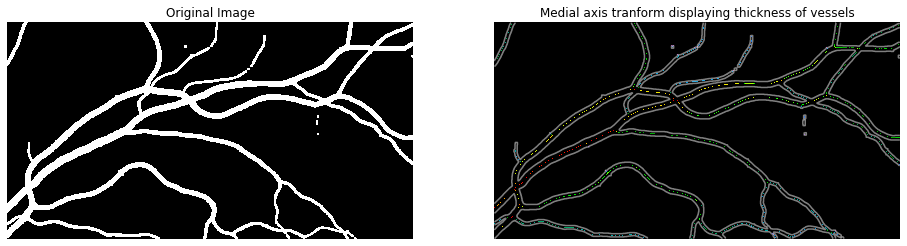

In [22]:
# Applying medial axis transformation

skel, distance = medial_axis(im_open, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

plt.figure(figsize = (16,16))
plt.subplot(121)
plt.imshow(im_open, cmap = "gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(122) 
plt.imshow(dist_on_skel, cmap= plt.cm.nipy_spectral) 
plt.contour(im_open, [0.5], colors='w', alpha = 0.5) 
plt.title('Medial axis tranform displaying thickness of vessels')
plt.axis('off') 


#Thickness according to VIBGYOR scheme. R- thickest
# Source: https://scikit-image.org/docs/0.10.x/auto_examples/plot_medial_transform.html

2.2 Part 3:  Find length and orientation of the vascular network in the image after thinning. Display the orientation distribution of the vascular network in a polar (rose) plot. 

The total length of vascular network is 9415.514071857853 and 330 lines are detected


Text(0.5, 1.05, 'Rose plot of angles')

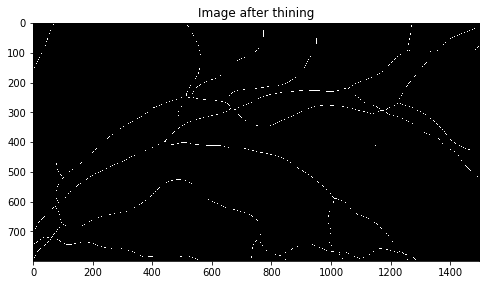

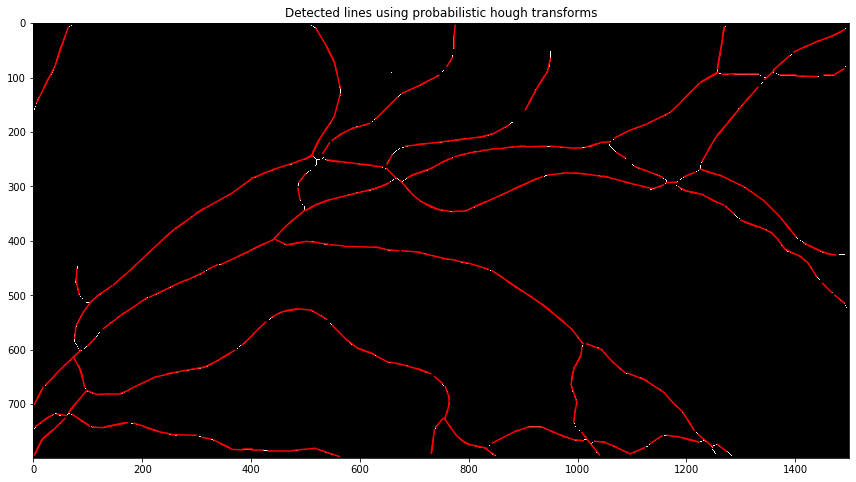

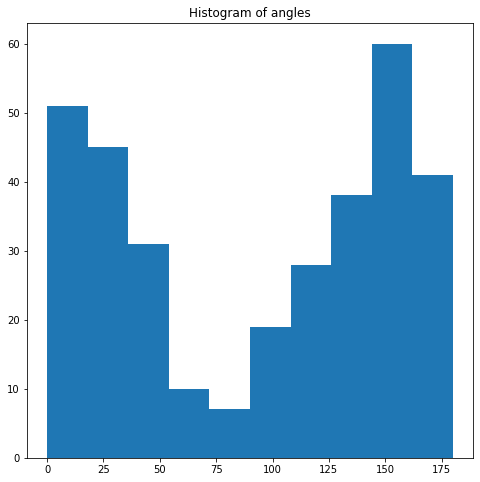

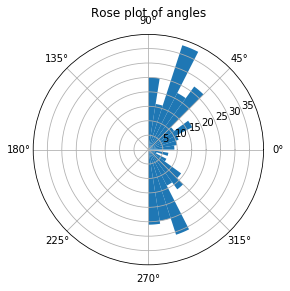

In [23]:
# Finding approximate length of the vessel through probabilistic hough transform
# Finding orientation of vascular network through hough transform on skeletonized image

im_edges = feature.canny(thinned, sigma=0.1,low_threshold= 1.4 , high_threshold= 4.4)
# This step is not necessary, I already got the thinned result

plt.figure(figsize = (8,8))
plt.imshow(thinned, cmap = "gray")
plt.title("Image after thining")


# Probabilistic hough transform

lines = probabilistic_hough_line(thinned, threshold=10, line_length=15, line_gap=5)


plt.figure(figsize=(15,8))
plt.imshow(thinned, cmap='gray') 
row1, col1 = thinned.shape

angleVec = []
length = [] 
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]), '-r')
    diffx = p0[0] - p1[0]
    diffy = p0[1] - p1[1]
    Length = math.sqrt((diffx*diffx + diffy*diffy))
    angle = math.degrees(math.atan2(diffy,diffx))
    #angle = angle - 90 #(to scale between -90 and 90)
    #if(angle < 0):
        #angle = angle + 90 
    angleVec.append(angle)
    length.append(Length)
    
plt.title('Detected lines using probabilistic hough transforms')

print("The total length of vascular network is {} and {} lines are detected".format(sum(length),len(length)))

# Getting distribution of angles
plt.figure(figsize = (8,8))
plt.hist(angleVec)
plt.title("Histogram of angles")

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
N = 20
radii = np.histogram(angleVec,bins=N)
atheta = np.arange(-np.pi/2, np.pi/2, np.pi/N)
width = np.pi/N
bars = plt.bar(atheta+np.pi/(2*N), radii[0], width=width, bottom=0.0)
plt.title("Rose plot of angles")



